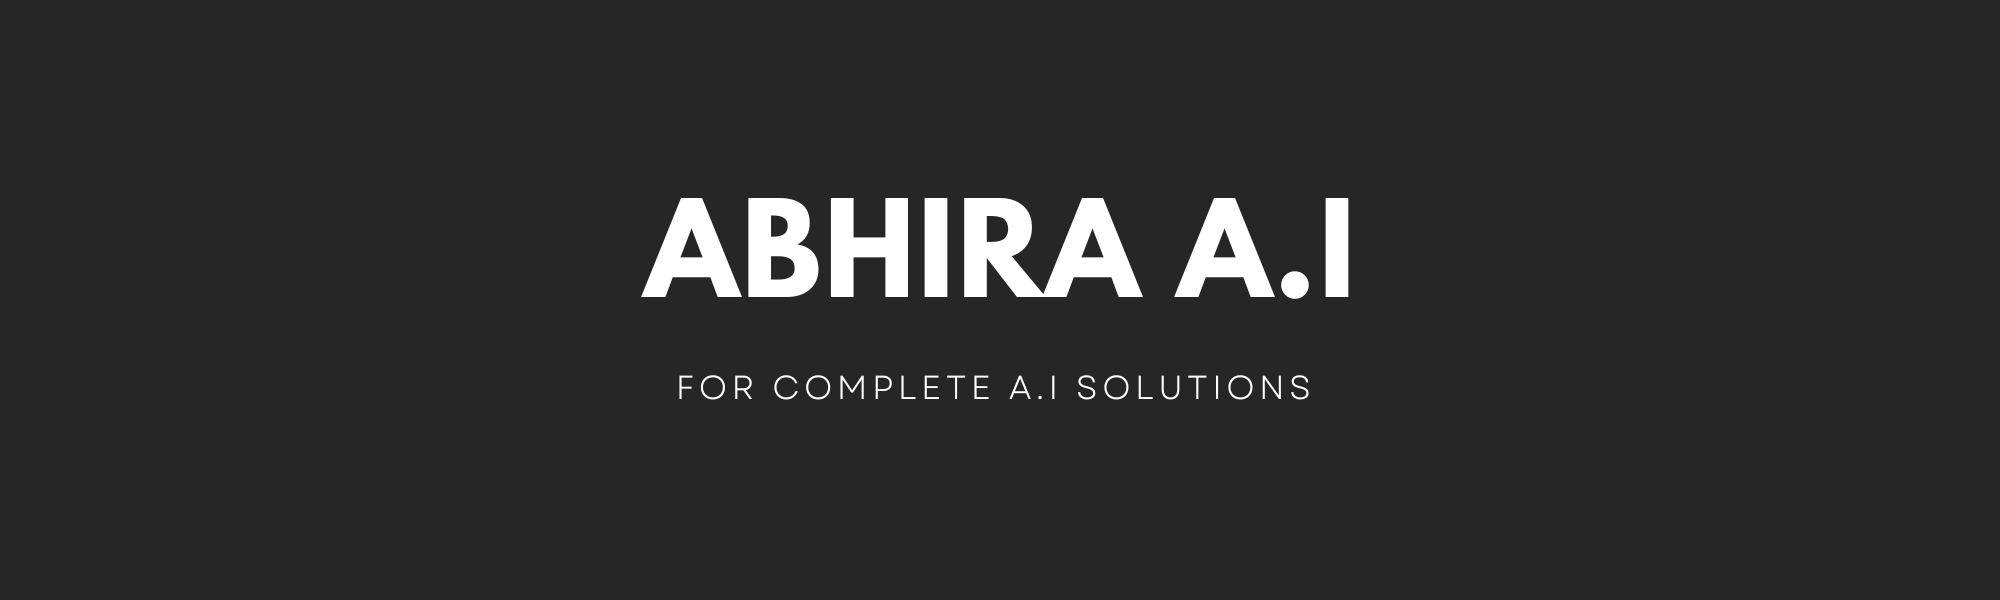

# Typing anomaly detection , with a number of parameters

>The provided code implements a simple machine learning (ML) model for anomaly detection in user input based on their typing behavior. The model is built using an isolation forest algorithm, which is a type of unsupervised ML technique used for anomaly detection.

>To train the model, the code prompts the user to type a few predefined sentences and records their typing behavior, such as key press duration and pause duration. The collected data is then used to train the isolation forest model.

>Once the model is trained, the code prompts the user to enter a new sentence, and the model predicts whether the input is an anomaly or not based on the user's typing behavior. If an anomaly is detected, the code outputs "Anomaly detected!", otherwise it outputs "No anomaly detected."

>This code can be useful in various applications where anomaly detection is required, such as fraud detection, intrusion detection, and fault detection. It also demonstrates how simple ML models can be built using minimal data collection, and how unsupervised learning techniques can be used for anomaly detection.

In [13]:
# Import required libraries
import time
import numpy as np
from sklearn.ensemble import IsolationForest

# Define the sentences to be used for data collection
sentences = ["The quick brown fox jumps over the lazy dog.", 
             "Jackdaws love my big sphinx of quartz.", 
             "How vexingly quick daft zebras jump!"]

# Prompt the user to type each sentence and record typing behavior
data = []
for sentence in sentences:
    print("Type the following sentence: ", sentence)
    input_text = input()
    key_press_times = []
    key_press_durations = []
    pause_durations = []
    last_key_up_time = 0
    for i in range(len(input_text)):
        if input_text[i] != sentence[i]:
            print("Error in typing!")
            break
        key_press_times.append(time.time())
        key_press_durations.append(key_press_times[-1] - last_key_up_time)
        last_key_up_time = key_press_times[-1]
        if i < len(input_text) - 1 and input_text[i + 1] != ' ':
            pause_durations.append(key_press_times[-1] - last_key_up_time)
            last_key_up_time = key_press_times[-1]
    data.append([np.mean(key_press_durations), np.std(key_press_durations), np.mean(pause_durations), np.std(pause_durations)])

# Build the isolation forest model using the collected data
model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
model.fit(data)

# Prompt the user to enter a new sentence and predict if it is an anomaly
new_sentence = input("Type a new sentence: ")
key_press_times = []
key_press_durations = []
pause_durations = []
last_key_up_time = 0
for i in range(len(new_sentence)):
    key_press_times.append(time.time())
    key_press_durations.append(key_press_times[-1] - last_key_up_time)
    last_key_up_time = key_press_times[-1]
    if i < len(new_sentence) - 1 and new_sentence[i + 1] != ' ':
        pause_durations.append(key_press_times[-1] - last_key_up_time)
        last_key_up_time = key_press_times[-1]
prediction = model.predict([[np.mean(key_press_durations), np.std(key_press_durations), np.mean(pause_durations), np.std(pause_durations)]])
if prediction[0] == -1:
    print("Anomaly detected!")
else:
    print("No anomaly detected.")


Type the following sentence:  The quick brown fox jumps over the lazy dog.
The quick brown fox jumps over the lazy dog.
Type the following sentence:  Jackdaws love my big sphinx of quartz.
Jackdaws love my big sphinx of quartz.
Type the following sentence:  How vexingly quick daft zebras jump!
How vexingly quick daft zebras jump!
Type a new sentence: hi , my name is abhishek sebastian
No anomaly detected.
